In [25]:
import numpy as np
import matplotlib.pyplot as plt

Задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.


In [26]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [27]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [28]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [29]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [30]:
z = np.linspace(-100, 100, 101)
z

array([-100.,  -98.,  -96.,  -94.,  -92.,  -90.,  -88.,  -86.,  -84.,
        -82.,  -80.,  -78.,  -76.,  -74.,  -72.,  -70.,  -68.,  -66.,
        -64.,  -62.,  -60.,  -58.,  -56.,  -54.,  -52.,  -50.,  -48.,
        -46.,  -44.,  -42.,  -40.,  -38.,  -36.,  -34.,  -32.,  -30.,
        -28.,  -26.,  -24.,  -22.,  -20.,  -18.,  -16.,  -14.,  -12.,
        -10.,   -8.,   -6.,   -4.,   -2.,    0.,    2.,    4.,    6.,
          8.,   10.,   12.,   14.,   16.,   18.,   20.,   22.,   24.,
         26.,   28.,   30.,   32.,   34.,   36.,   38.,   40.,   42.,
         44.,   46.,   48.,   50.,   52.,   54.,   56.,   58.,   60.,
         62.,   64.,   66.,   68.,   70.,   72.,   74.,   76.,   78.,
         80.,   82.,   84.,   86.,   88.,   90.,   92.,   94.,   96.,
         98.,  100.])

In [31]:
def calc_logloss(y, y_pred):
    for i in range(len(y_pred)):
        if y_pred[i] <= 0:
            y_pred[i] = 0.1
        elif (1 - y_pred[i]) <= 0:
            y_pred[i] = 0.9
        else:
            pass
            
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [32]:
y1 = np.array([1, 0, 1, 1, 0])
y_pred1 = np.array([0.9, 0.1, 1, 0.8, 0])
calc_logloss(y1, y_pred1)

0.12891712278910297

Задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [33]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    logloss = []
    iter_v = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        logloss.append(err)
        iter_v.append(i)
        if i % (iterations / 10) == 0:
            print(i, W, err)
        
    return W, logloss, iter_v

In [82]:
W, logloss, iter_v = eval_model(X_st, y, iterations= 80, alpha=0.6)

8 [-0.06451041 -0.66882917  0.96613941  1.25523694] 0.5456167551953097
16 [-0.28334042 -0.7061441   1.07501135  1.40396413] 0.526658948980951
24 [-0.45613689 -0.75869182  1.11350971  1.56745997] 0.5132971866713245
32 [-0.6181851  -0.80895799  1.12620314  1.71705488] 0.5018575853787367
40 [-0.77338288 -0.84717177  1.12469181  1.85566401] 0.4923055683145344
48 [-0.923286   -0.8752884   1.11322247  1.98479159] 0.4838690416550887
56 [-1.06913227 -0.8974382   1.09401536  2.10473139] 0.4761966815310588
64 [-1.2113991  -0.91549375  1.06876175  2.216555  ] 0.4691224480749673
72 [-1.35028678 -0.93032553  1.03882195  2.3214666 ] 0.46253553624235383
80 [-1.48593614 -0.94254603  1.00527649  2.42048963] 0.4563575509034508


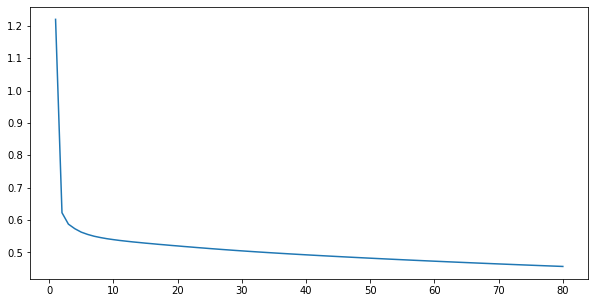

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(iter_v, logloss)

Задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [69]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(W, X))
    return y_pred_proba

Задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [70]:
def calc_pred(W, X):
    y_pred = np.round(calc_pred_proba(W, X))
    return y_pred

y_pred = calc_pred(W, X)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [71]:
def error_matrix(y, y_pred):
    TP = sum((y == 1) & (y_pred == 1))
    FP = sum((y == 0) & (y_pred == 1))
    TN = sum((y == 0) & (y_pred == 0))
    FN = sum((y == 1) & (y_pred == 0))
    return TP, FP, TN, FN

In [72]:
TP, FP, TN, FN = error_matrix(y, y_pred)

In [73]:
def accuracy(TP, FP, TN, FN):
    acc = (TP + TN)/(TP + FP + TN + FN)
    return acc

In [74]:
def presision(TP, FP):
    pres = TP/(TP + FP)
    return pres

In [75]:
def recall(TP, FN):
    rec = TP/(TP + FN)
    return rec

In [76]:
accuracy(TP,FP, TN, FN)

0.5

In [77]:
error_matrix(y, y_pred)

(5, 5, 0, 0)

In [78]:
pres = presision(TP, FP)

In [79]:
rec = recall(TP, FN)

In [81]:
F1_score = (2 * pres * rec)/(pres + rec)
F1_score

0.6666666666666666

Задание 6: Могла ли модель переобучиться? Почему?

Модель могл